In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Polynomial Regression  
What if your data is more complex than a straight line? Surprisingly, you can use a  
linear model to fit nonlinear data. A simple way to do this is to add powers of each  
feature as new features, then train a linear model on this extended set of features. This  
technique is called Polynomial Regression.  
Let’s look at an example. First, let’s generate some nonlinear data, based on a simple
quadratic equation

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

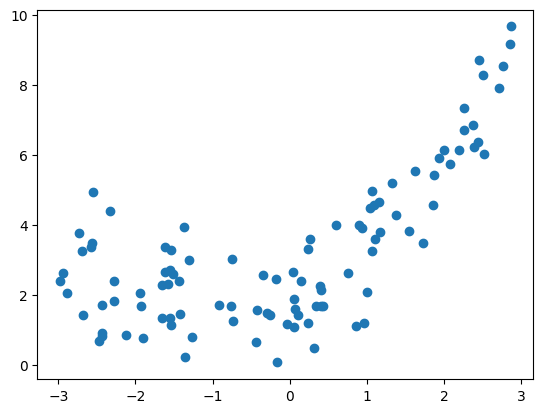

In [6]:
plt.scatter(X, y)

plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (seconddegree polynomial) of each feature in the training set as a new feature (in this case
there is just one feature):


In [8]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

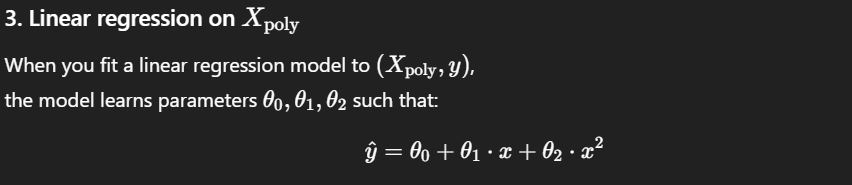

1. m = 100

We choose the dataset size: 100 training examples.

2. X = 6 * np.random.rand(m, 1) - 3

np.random.rand(m, 1) → random numbers between 0 and 1, shape (100 × 1).

Multiply by 6 → scales them to [0, 6).

Subtract 3 → shifts them to [-3, 3).

👉 So now X is 100 random values between -3 and 3.
This is your input feature.  
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
This generates the target variable (the output).

0.5 * X**2 + X + 2 → defines a quadratic relationship (a parabola).

np.random.randn(m, 1) → adds Gaussian noise (mean 0, std 1).

Makes the data look more “realistic”, not perfectly on the curve.

👉 So each pair (X, y) is a noisy observation of the parabola:   
y=0.5x2+x+2+noise

Step 1: The limitation

If you now try to fit a linear regression model directly on X → y,
the model can only learn something like:


y≈a⋅x+b

👉 That’s just a straight line.
But your data is quadratic (a parabola).
A straight line won’t fit well.

Step 2: The trick

To fit non-linear data with linear regression, we transform the input.
Instead of feeding the model just 
Instead of feeding the model just 
𝑥
x, we also feed it 
𝑥
2
x
2
.

That’s exactly what this line does:  
poly_features = PolynomialFeatures(degree=2, include_bias=False)  
X_poly = poly_features.fit_transform(X)  



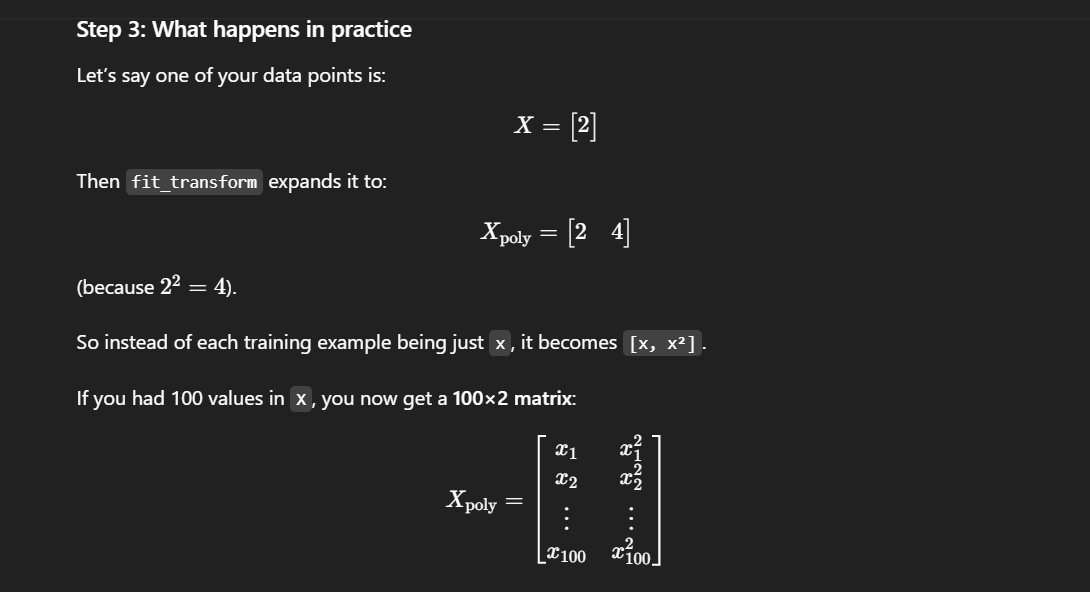
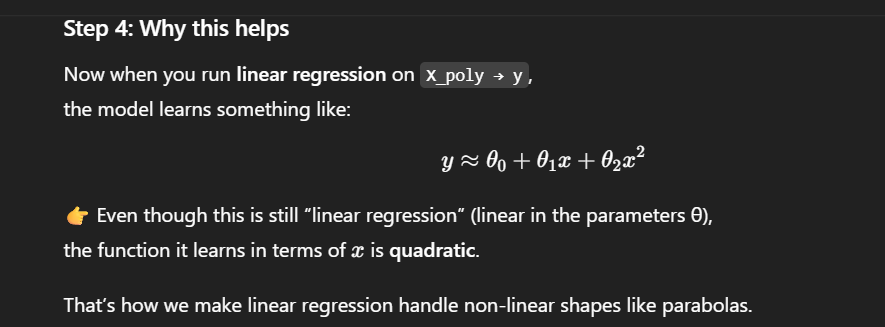

In [9]:
X[0]

array([0.39659992])

In [11]:
X_poly[0]

array([0.39659992, 0.1572915 ])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data 

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
lin_reg.intercept_, lin_reg.coef_


(array([1.97905857]), array([[0.96595106, 0.47633908]]))

In [15]:
y_pred = lin_reg.predict(X_poly)

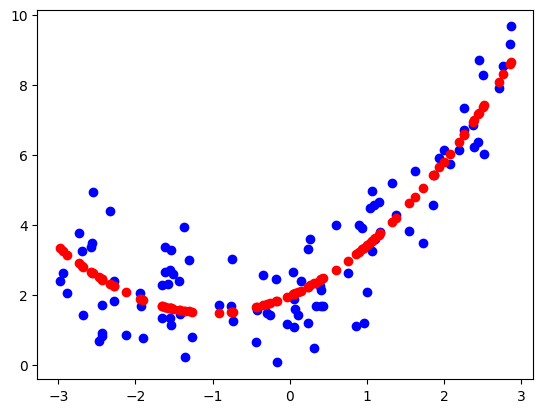

In [16]:
plt.scatter(X, y, color="blue")
plt.scatter(X, y_pred, color="red")
plt.show()